<a href="https://colab.research.google.com/github/JaredLevi18/Stock-market-predictor./blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
! pip install pandas_ta

In [23]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
data = yf.download(tickers="^GSPC", start="2012-03-11", end = "2023-08-09")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,1370.780029,1373.040039,1366.689941,1371.089966,1371.089966,3081870000
2012-03-13,1371.920044,1396.130005,1371.920044,1395.949951,1395.949951,4386470000
2012-03-14,1395.949951,1399.420044,1389.969971,1394.280029,1394.280029,4502280000
2012-03-15,1394.170044,1402.630005,1392.780029,1402.599976,1402.599976,4271650000
2012-03-16,1402.550049,1405.880005,1401.469971,1404.170044,1404.170044,5163950000
...,...,...,...,...,...,...
2023-08-02,4550.930176,4550.930176,4505.750000,4513.390137,4513.390137,4270710000
2023-08-03,4494.270020,4519.490234,4485.540039,4501.890137,4501.890137,4149120000
2023-08-04,4513.959961,4540.339844,4474.549805,4478.029785,4478.029785,4143310000


In [14]:
# Adding indicators
# Relative strength index: charts the current strength or weakness of the stock based on the closing prices of recent trading period.
data['RSI'] = ta.rsi(data.Close, length=15)

data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [15]:
data_set = data.iloc[:, 0:11] #.values
pd.set_option('display.max_columns', None)
data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1432.819946,1443.900024,1432.819946,1432.839966,46.542416,1443.599870,1405.823514,1382.254066,-4.250000,0,1428.589966
1,1432.839966,1438.430054,1425.530029,1428.589966,44.420706,1442.170355,1406.274334,1382.867786,11.380005,1,1440.130005
2,1428.750000,1441.310059,1427.239990,1440.130005,50.928689,1441.976036,1406.944744,1383.626226,14.609985,1,1454.920044
3,1440.310059,1455.510010,1440.310059,1454.920044,57.725930,1443.208799,1407.894750,1384.570515,6.690063,1,1460.910034
4,1454.219971,1462.199951,1453.349976,1460.910034,60.122828,1444.894631,1408.944557,1385.581635,-3.599976,0,1457.339966
5,1460.939941,1464.020020,1452.630005,1457.339966,58.022041,1446.079901,1409.902882,1386.532076,-24.150024,0,1433.189941
6,1457.339966,1457.339966,1429.849976,1433.189941,46.297315,1444.852286,1410.364012,1387.150061,0.609985,1,1433.819946
7,1433.209961,1435.459961,1422.060059,1433.819946,46.598928,1443.801587,1410.828486,1387.768205,-20.630005,0,1413.109985
8,1433.739990,1433.739990,1407.560059,1413.109985,38.903386,1440.878577,1410.873664,1388.103858,-4.449951,0,1408.750000
9,1413.199951,1420.040039,1407.099976,1408.750000,37.506259,1437.818713,1410.831612,1388.377317,3.229980,1,1412.969971


In [16]:
# we scale data to be in the range 0-1
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0230242  0.02408329 0.02603376 ... 0.48695693 0.         0.02185739]
 [0.02303    0.02250146 0.02391256 ... 0.53909866 1.         0.0252089 ]
 [0.0218449  0.02333431 0.02441012 ... 0.54987388 1.         0.0295043 ]
 ...
 [0.9101054  0.91349628 0.91430708 ... 0.3812718  0.         0.90749085]
 [0.91581072 0.91952566 0.91110917 ... 0.5907395  1.         0.91922697]
 [0.90932596 0.91359738 0.91593943 ... 0.50563887 1.         0.91369146]]


In [17]:
# multiple features from data provided to the model
X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i,j])

# move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

# Erase first elements of y because of backcandles to match X length
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi, (len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2721
[[[2.30241995e-02 2.40832928e-02 2.60337619e-02 ... 1.49511302e-02
   3.28147847e-04 0.00000000e+00]
  [2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  ...
  [9.97640088e-03 8.85772233e-03 1.25236894e-02 ... 0.00000000e+00
   1.10172426e-06 2.17642941e-03]
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.83265559e-05 2.26220157e-03]
  [1.61656383e-02 1.40341317e-02 1.58088385e-02 ... 7.51828082e-04
   3.71735020e-05 2.33465177e-03]]

 [[2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  [2.51945232e-02 2.74407204e-02 2.82132171e-02 ... 1.48335774e-02
   9.80560424e-04 7.45184353e-04]
  ...
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.

In [18]:
# split data into train and test sets
splitlimits = int(len(X) * 0.8)
print(splitlimits)
X_train, X_test = X[:splitlimits], X[splitlimits:]
y_train, y_test = y[:splitlimits], y[splitlimits:]
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

2152
(539, 30, 8)
(2152, 30, 8)
(2152, 1)
(539, 1)


In [19]:
X_train.shape[-1]

8

In [33]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as op

X_train, X_test = torch.from_numpy(X_train), torch.from_numpy(y_train)
y_train, y_test = torch.from_numpy(y_train), torch.from_numpy(y_test)

# LSTM() returns tuple of (tensor, (recurrent state))
class extract_tensor(nn.Module):
    def forward(self,x):
        # Output shape (batch, features, hidden)
        tensor, _ = x
        # Reshape shape (batch, hidden)
        return tensor[:, -1, :]

model = nn.Sequential(
    #nn.Flatten(),
    nn.LSTM(input_size = X_train.shape[-1], hidden_size=542, num_layers=1),
    extract_tensor(),
    nn.Linear(in_features=542, out_features=8, bias=False),
    nn.BatchNorm1d(8),
    nn.ReLU(),
    nn.Linear(8,1, bias=False),
    nn.ReLU()
)

parameters = model.parameters()
print(p.nelement() for p in parameters) # print the number of parameters in total.
for p in parameters:
    p.requires_grad = True

<generator object <genexpr> at 0x7e13386a9230>


In [34]:
max_steps = 10
batch_size = 2152
lossi = []
model.double()

# training loop
for i in range(max_steps):

    # mini-batch construct
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    Xb, Yb = X_train[ix], y_train[ix]

    # forward pass
    logits = model(X_train)
    loss = F.cross_entropy(logits, Yb) # loss function

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update: simple SGD
    lr = 0.3 if i < (max_steps / 3) else 0.05 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad
    op.AdamW(params=model.parameters())

    # track of stats
    if i % 1 == 0:
        print(f"{i:7d}/{max_steps:7d}: {loss.item():4f}")
    lossi.append(loss.log10().item())

      0/     10: -0.000000
      1/     10: -0.000000
      2/     10: -0.000000
      3/     10: -0.000000
      4/     10: -0.000000
      5/     10: -0.000000
      6/     10: -0.000000
      7/     10: -0.000000
      8/     10: -0.000000
      9/     10: -0.000000


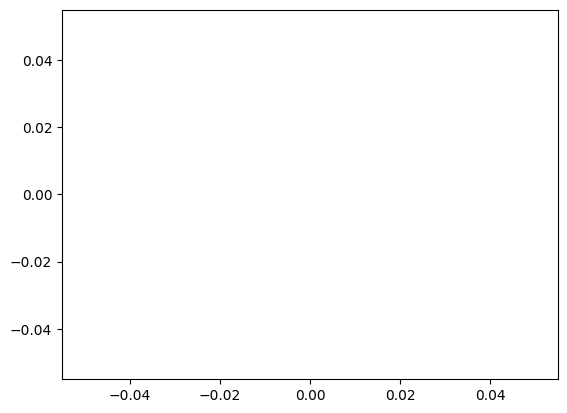

In [35]:
plt.plot(torch.tensor(lossi).view(-1, 10).mean(1))

In [36]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
    x,y = {
        'train': (X_train, y_train),
        'val': (X_test, y_test),
    }[split]
    logits = model(x)
    loss = F.cross_entropy(logits,y)
    print(split, loss.item())

split_loss('train')
split_loss('val')

train -0.0


RuntimeError: ignored

RuntimeError: ignored

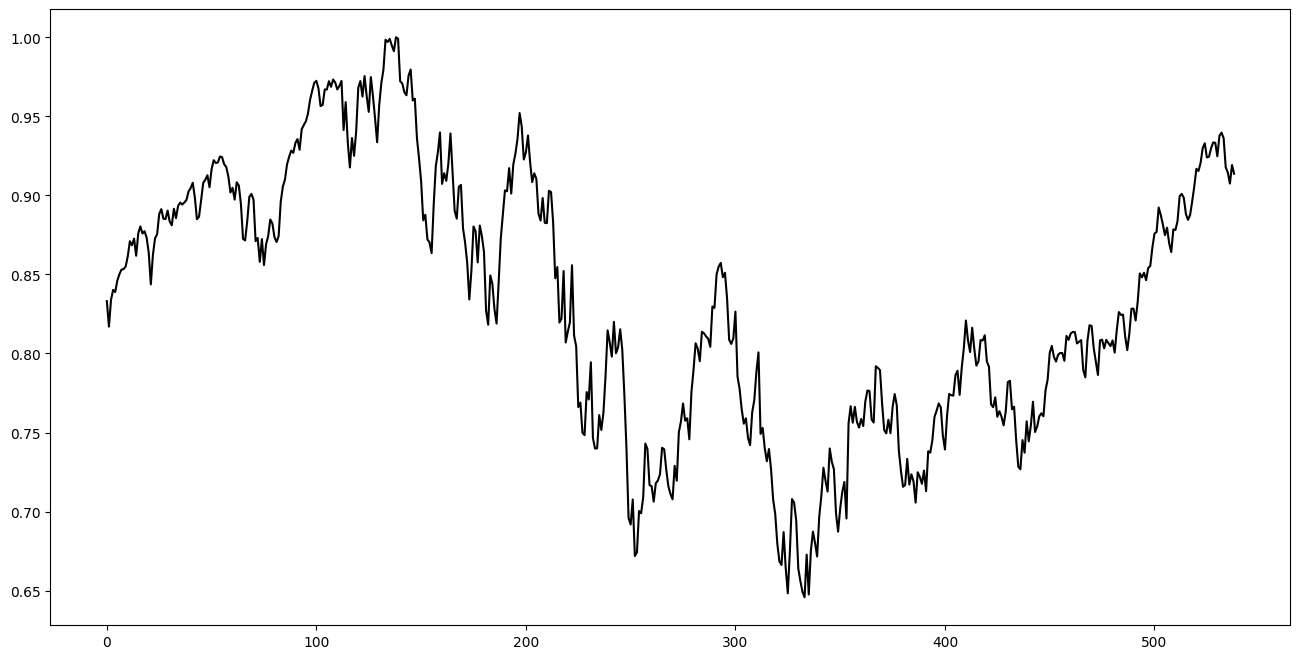

In [38]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(logits, color = 'green', label = 'Target')